In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
import datetime as time

In [ ]:
data=yf.download("BTC-USD",start='2014-09-17',stop=time.date.today())

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2022-01-25,36654.804688,37444.570312,35779.429688,36954.003906,36954.003906,26428189594


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2.690000e+03
mean,11057.543299,11356.188276,10726.254469,11069.228073,11069.228073,1.464335e+10
std,15937.257660,16367.786009,15437.768232,15939.242170,15939.242170,2.008612e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,603.117752,607.302017,597.563766,604.969269,604.969269,7.853595e+07
50%,6250.524902,6386.405029,6118.759033,6265.410156,6265.410156,5.009696e+09
75%,10345.645020,10565.726318,10105.086914,10346.523193,10346.523193,2.456302e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


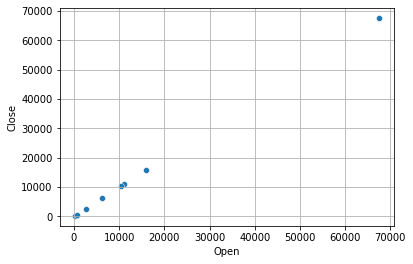

In [ ]:
sb.scatterplot(data.describe()["Open"],data.describe()["Close"],);
plt.grid()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2690 entries, 2014-09-17 to 2022-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2690 non-null   float64
 1   High       2690 non-null   float64
 2   Low        2690 non-null   float64
 3   Close      2690 non-null   float64
 4   Adj Close  2690 non-null   float64
 5   Volume     2690 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.1 KB


Text(1.0, 1.0, 'low values')

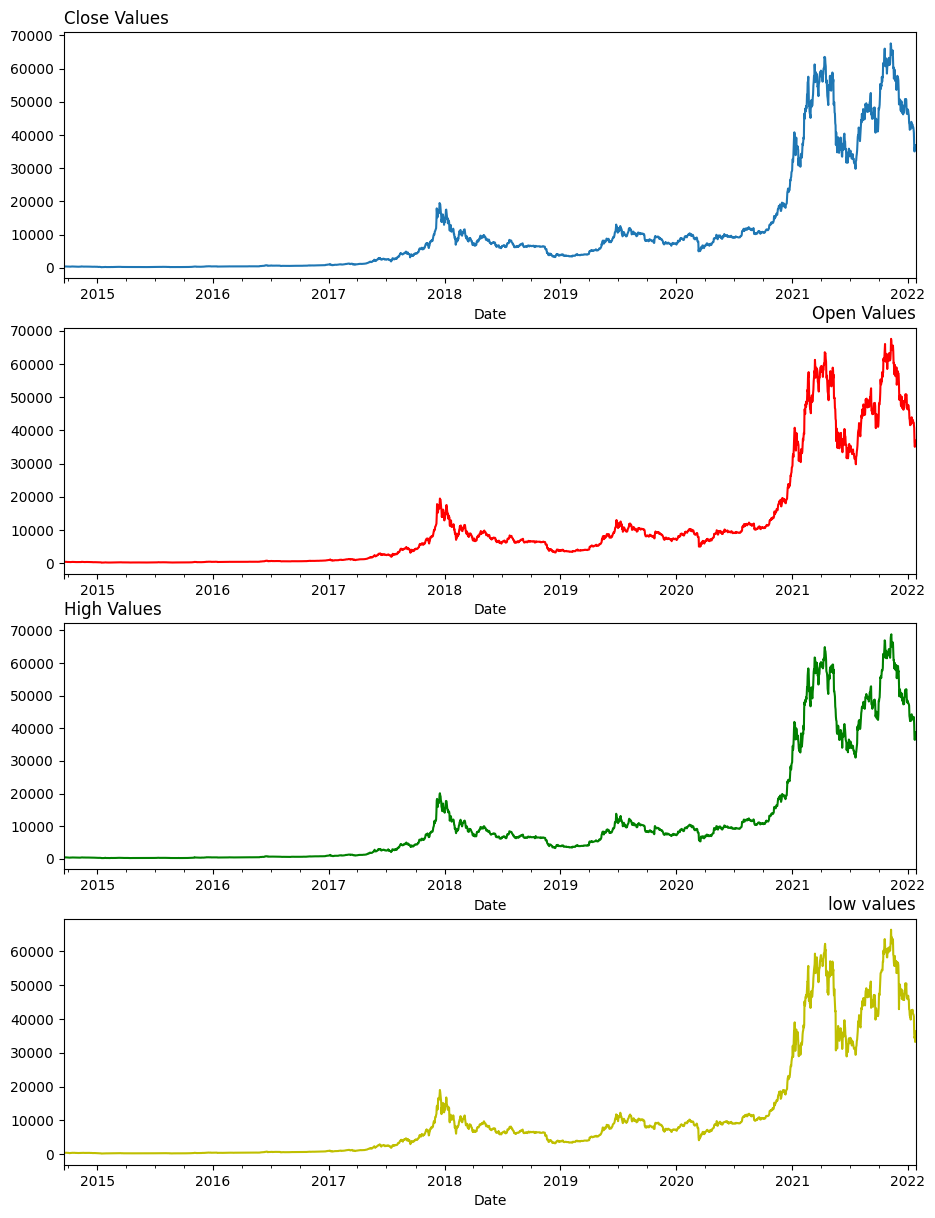

In [ ]:
plt.figure(figsize=(11,15),dpi=100)
plt.subplot(411)
data.Close.plot()
plt.title("Close Values",loc="left")
plt.subplot(412)
data.Open.plot(c="r")
plt.title("Open Values",loc="right")
plt.subplot(413)
data.High.plot(c="g")
plt.title("High Values",loc="left")
plt.subplot(414)
data.Low.plot(c="y")
plt.title("low values",loc="right")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


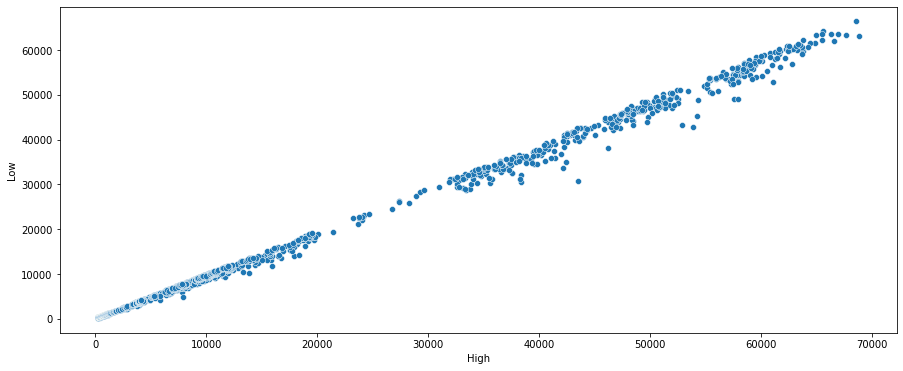

In [ ]:
plt.figure(figsize=(15,6))
sb.scatterplot(data.High,data.Low)

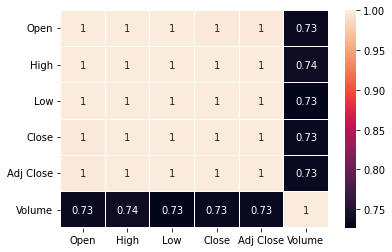

In [ ]:
sb.heatmap(data.corr(),annot=True,linewidths=0.01)

In [ ]:
x=data.drop("Close",axis=1)
y=data.Close
x_full_train,x_test,y_full_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_full_train,y_full_train,test_size=0.2)

In [ ]:
model=Sequential()
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50,activation="linear"))
model.add(BatchNormalization())
model.add(Dense(40,activation="relu"))
model.add(Dense(1,activation="linear"))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
54/54 [==============================] - 2s 11ms/step - loss: 377373312.0000 - val_loss: 357313728.0000
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 376823552.0000 - val_loss: 356052640.0000
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 375382656.0000 - val_loss: 353616288.0000
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 372738464.0000 - val_loss: 350199552.0000
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 368718752.0000 - val_loss: 345467360.0000
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 362815584.0000 - val_loss: 338969984.0000
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 355105472.0000 - val_loss: 330877184.0000
Epoch 8/100
54/54 [==============================] - 0s 5ms/step - loss: 345728896.0000 - val_loss: 321134240.0000
Epoch 9/100
54/54 [==============================] - 0s 5ms/step - loss: 333150

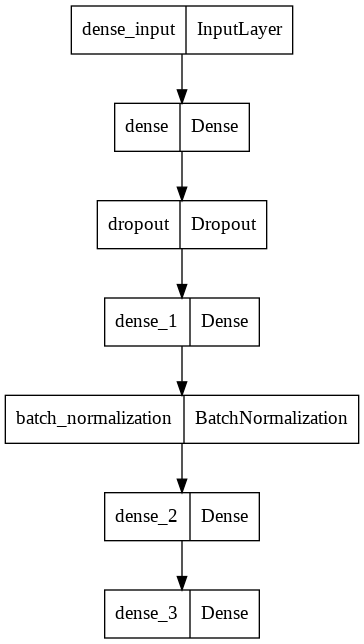

In [ ]:
plot_model(model)

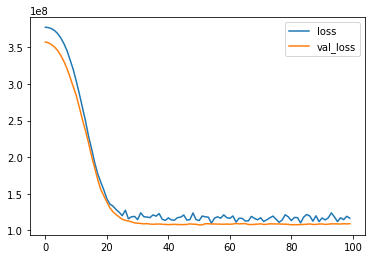

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
y_pred=model.predict(x_test)

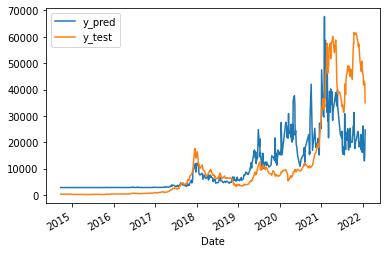

In [ ]:
y_=pd.DataFrame(data=y_pred,index=y_test.index,columns=["y_pred"])
y_["y_test"]=y_test.values
y_.plot()